In [2]:
import scipy.io as scio

In [3]:
Dmos=[]
index=2
for j in range(4,7):
    for i in range(0,8):
        index=index+1
        path = '/Users/jessica/CMT309/Project-VMAF/LIVE_NFLX_PublicData_Release/content_'+str(j)+'_seq_'+str(i)+'.mat'
        data = scio.loadmat(path)
        Dmos.append((index,(data['final_subj_score']*20)+100))

In [4]:
Dmos

[(3, array([[117.88163116]])),
 (4, array([[77.58410662]])),
 (5, array([[67.91195516]])),
 (6, array([[73.90409833]])),
 (7, array([[76.20880293]])),
 (8, array([[77.69179472]])),
 (9, array([[79.06334592]])),
 (10, array([[70.61245429]])),
 (11, array([[116.26050256]])),
 (12, array([[94.88609898]])),
 (13, array([[76.51846811]])),
 (14, array([[84.56423849]])),
 (15, array([[83.12164798]])),
 (16, array([[88.17974099]])),
 (17, array([[89.50126953]])),
 (18, array([[83.23762229]])),
 (19, array([[121.33408353]])),
 (20, array([[88.0420575]])),
 (21, array([[79.38867645]])),
 (22, array([[84.27898804]])),
 (23, array([[83.86165956]])),
 (24, array([[82.70964603]])),
 (25, array([[92.52067508]])),
 (26, array([[81.69860368]]))]

In [117]:
VMAFlist=[]
SubjScore=[]
index=2
for j in range(4,7):
    for i in range(0,8):
        index=index+1
        path = '/Users/jessica/CMT309/Project-VMAF/LIVE_NFLX_PublicData_Release/content_'+str(j)+'_seq_'+str(i)+'.mat'
        data = scio.loadmat(path)
        VMAFlist.append(data['VMAF_mean'][0][0])
        SubjScore.append(data['final_subj_score'][0][0])

In [118]:
import pandas as pd
frame = pd.DataFrame({'VMAF':VMAFlist,'Sub':SubjScore})

In [119]:
frame.corr(method='spearman')

,VMAF,Sub
VMAF,1.000000,0.235652
Sub,0.235652,1.000000


In [123]:
from sklearn.metrics import mean_squared_error
import math
MSE=mean_squared_error(VMAFlist, SubjScore)
print("RMSE:",math.sqrt(MSE))

RMSE: 13.053221368558136


In [5]:
Finallist=[]
path2='/Users/jessica/CMT309/Project-VMAF/Dataset_Information/Mat_Files/MeridianConversation_HuangBufferBasedAdaptor_Trace_5.mat'
data2 = scio.loadmat(path2)
Finallist.append((data2['content_name'],(data2['retrospective_zscored_mos']+3)*100/6))

In [10]:
data2["throughput_trace_name"]

array(['Ferry_nesoddtangen_oslo'], dtype='<U23')

In [11]:
data2.keys()

dict_keys(['__header__', '__version__', '__globals__', 'content_name', 'STRRED', 'N_playback_frames', 'VMAF', 'SSIM', 'buffer_evolution_sec', 'height', 'playback_duration_sec', 'playout_bitrate', 'continuous_zscored_mos', 'scene_cuts_detected', 'PSNR', 'MSSIM', 'per_segment_encoding_QP', 'rebuffer_duration_sec', 'video_duration_sec', 'width', 'per_segment_encoding_height', 'selected_streams', 'distorted_mp4_video', 'adaptation_algorithm', 'rebuffer_number', 'content_spatial_information', 'content_temporal_information', 'frame_rate', 'per_segment_encoding_width', 'cropping_parameters', 'throughput_trace_name', 'content_name_acronym', 'scene_cuts', 'N_rebuffer_frames', 'is_rebuffered_bool', 'throughput_trace_kbps', 'reference_yuv_video', 'N_total_frames', 'retrospective_zscored_mos'])

In [12]:
data2['VMAF'].mean()

87.19987301409292

In [13]:
(data2['retrospective_zscored_mos']+3)*100/6

array([[71.20594786]])

In [14]:
data2['PSNR'].mean()

41.5776242853567

In [275]:
l1=[100.0,100.0,100.0,100.0,100.0,100.0,100.0,71.20594786,77.33257646,80.02137423,70.9271815,64.80535644,70.54420571,68.77750425, 69.2465279,51.06704602,58.83564129,65.26753674,60.60814239,56.27065646,60.60716474,57.67124787,54.56480162,50.58734211,64.64713045,65.99035516,66.69877301,50.65387293,60.03525298,68.79083488,58.99545326,65.07991342,68.70405091,69.33157037,69.19903054]

In [306]:
Finallist=[]
path2='/Users/jessica/CMT309/Project-VMAF/Dataset_Information/Mat_Files/MeridianDriving_HuangBufferBasedAdaptor_Trace_5.mat'
data2 = scio.loadmat(path2)
Finallist.append((data2['content_name'],data2['VMAF'].mean()))

In [307]:
Finallist

[(array(['MeridianDriving'], dtype='<U15'), 75.12350024993493)]

In [276]:
l2=[100.0,100.0,100.0,100.0,100.0,100.0,100.0,87.19987301409292,90.92099034971685,91.3283338529103,89.9950431716576,75.12350024993493,80.13607764374528,80.82550983114113,80.83395793389445,62.5906814486326,76.3845278477572,76.2718060257726,75.95088591322556,54.42316332148595,63.939002582733856,63.19360311490098,62.992236107136755,57.15186906942241,68.36970075617724,66.64420965223869,67.82217927910051,59.97220257526607,73.58611103449748,72.80321862978249,72.16540487226851,73.57804369423492,85.47642842273812,81.59721959082678,83.75833493901916]

In [277]:
framew = pd.DataFrame({'VMAF':l2,'Sub':l1})

In [278]:
framew.corr(method='spearman')

,VMAF,Sub
VMAF,1.000000,0.931677
Sub,0.931677,1.000000


In [279]:
framew.corr(method='pearson')

,VMAF,Sub
VMAF,1.000000,0.921387
Sub,0.921387,1.000000


In [280]:
MSE=mean_squared_error(l2, l1)
print("RMSE:",math.sqrt(MSE))

RMSE: 10.082021454230317


In [284]:
from matplotlib import pyplot as plt
def drawScatter(sample_data):
    plt.figure()
    plt.xlabel('DMOS')
    plt.ylabel('VMAF_score')
    plt.xlim(xmax=100,xmin=50)
    plt.ylim(ymax=100,ymin=50)
    x=list(sample_data["Sub"])
    y=list(sample_data["VMAF"])  
    plt.scatter(x, y, marker='o',label='VMAF')
    plt.legend(loc = "best" )#图例
    plt.grid()
    #plt.plot([50,105], [50,105])
    plt.show()

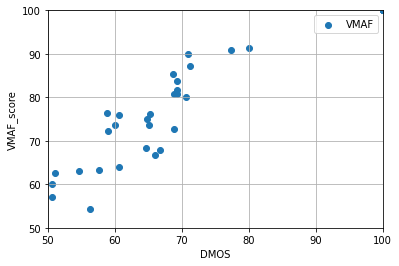

In [285]:
drawScatter(framew)